In [1]:
import pandas as pd

pima_clean = pd.read_csv('diabetes_clean.csv')
pima_clean.head()

,log_pregnant,glucose,pressure,triceps,log_insulin,log_pedigree,log_age,mass,diabetes
0,1.945910,148.0,72.0,35.000000,5.579791,-0.466809,3.912023,33.6,pos
1,0.693147,85.0,66.0,29.000000,4.023256,-1.046969,3.433987,26.6,neg
2,2.197225,183.0,64.0,20.018286,5.501581,-0.397497,3.465736,23.3,pos
3,0.693147,89.0,66.0,23.000000,4.543295,-1.789761,3.044522,28.1,neg
4,0.000000,137.0,40.0,35.000000,5.123964,0.827678,3.496508,43.1,pos


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

# Define the target variable
target = pima_clean['diabetes']

# Define the predictor variables
predictors = pima_clean.drop('diabetes', axis=1)
# Create an instance of StandardScaler
scaler = StandardScaler()

# Standardize the predictors
predictors_standard = scaler.fit_transform(predictors)

# Fit the GLM model
model = LogisticRegression()
model.fit(predictors_standard, target)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Perform cross-validation
cv_scores = cross_val_score(model, predictors_standard, target, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1))

print("Mean cross-validation score:", cv_scores.mean())

y_pred = cross_val_predict(model, predictors_standard, target, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1))
cm = confusion_matrix(target, y_pred)
cm

Coefficients: [[ 0.1724771   0.57608434 -0.10701523  0.20206995  0.07323743  0.21092117
   0.10589178  0.24127823]]
Intercept: [-0.73060879]
Mean cross-validation score: 0.693659281894576


array([[429,  70],
       [165, 103]], dtype=int64)

Mean Accuracy (k=1): 0.6257703081232492
Mean Accuracy (k=5): 0.6583906289788642
Mean Accuracy (k=15): 0.6819200407435702
Mean Accuracy (k=25): 0.6819030642560053
Mean Accuracy (k=35): 0.6884644766997707
Mean Accuracy (k=45): 0.693684746625923
Mean Accuracy (k=55): 0.6936423054070112
Mean Accuracy (k=65): 0.6936762583821408
Mean Accuracy (k=75): 0.7001612766318648
Mean Accuracy (k=85): 0.6975723622782446
Mean Accuracy (k=95): 0.7040913335030983
Mean Accuracy (k=105): 0.6988795518207283
Mean Accuracy (k=115): 0.698871063576946
Mean Accuracy (k=135): 0.6897462015109073
Mean Accuracy (k=155): 0.693659281894576
Mean Accuracy (k=201): 0.688422035480859
Mean Accuracy (k=301): 0.6557932263814616
Mean Accuracy (k=401): 0.650589932942874
Mean Accuracy (k=501): 0.650589932942874
Mean Accuracy (k=601): 0.650589932942874


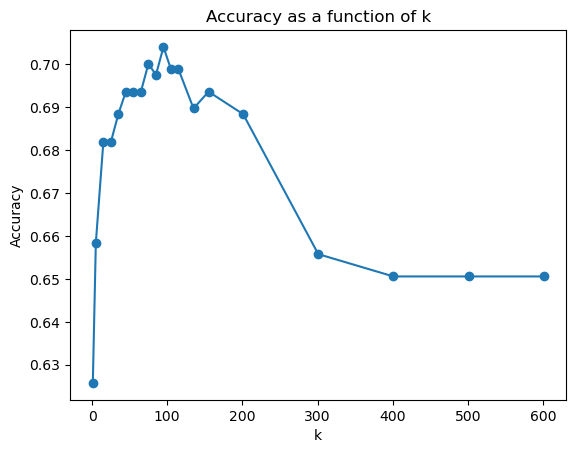

array([[407,  92],
       [152, 116]], dtype=int64)

In [28]:
# Import the required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Define the features and target variables
X = predictors_standard  # Features
y = target  # Target

# Apply k-NN with different values of k
k_values = [1, 5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 135, 155, 201, 301, 401, 501, 601]
acc = []

for k in k_values:
    # Create a k-NN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Perform 5-fold cross-validation
    scores = cross_val_score(knn, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1), scoring='accuracy')

    # Calculate the mean accuracy score
    acc.append(scores.mean())
    print(f"Mean Accuracy (k={k}):", scores.mean())

import matplotlib.pyplot as plt

# Plotting the errors as a function of k
plt.plot(k_values, acc, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy as a function of k')
plt.show()

knn = KNeighborsClassifier(n_neighbors=15)

    # Perform 5-fold cross-validation
scores = cross_val_score(knn, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1), scoring='accuracy')
y_pred = cross_val_predict(knn, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1))
cm = confusion_matrix(target, y_pred)
cm

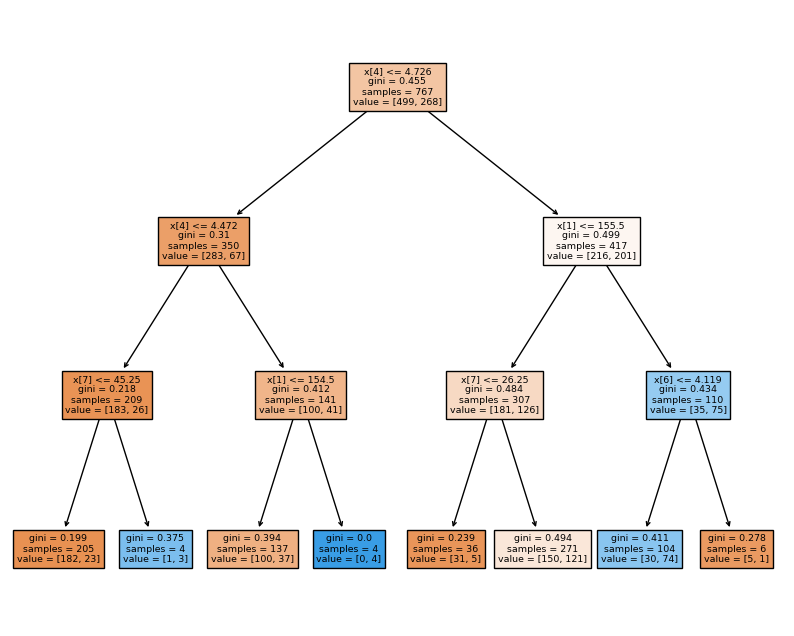

Mean Accuracy: 0.6858161446396741


array([[447,  52],
       [189,  79]], dtype=int64)

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Create the classifier object
clf = DecisionTreeClassifier(max_depth=3, random_state=1)

# Fit the classifier to the predictors and target
clf.fit(predictors, target)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf, predictors, target, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1))

import matplotlib.pyplot as plt
# Assuming you have a trained decision tree model named 'dt_model'
plt.figure(figsize=(10, 8))
plot_tree(clf, filled=True)
plt.show()

# Print the mean accuracy score
print("Mean Accuracy:", cv_scores.mean())

y_pred = cross_val_predict(clf, predictors, target, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1))
cm = confusion_matrix(target, y_pred)
cm

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Create an instance of RandomForestClassifier
rf_model = RandomForestClassifier()

# Perform cross-validation
cv_scores = cross_val_score(rf_model, predictors, target, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1))

# Print the mean cross-validation score
print("Mean cross-validation score:", cv_scores.mean())

y_pred = cross_val_predict(rf_model, predictors, target, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1))
cm = confusion_matrix(target, y_pred)
cm

Mean cross-validation score: 0.6765892002734109


array([[412,  87],
       [161, 107]], dtype=int64)

In [11]:
import pandas as pd

# Create a new DataFrame with predictors_standard and target as columns
new_df = pd.concat([pd.DataFrame(predictors_standard, columns=pima_clean.columns[:-1]), target], axis=1)

# Assign the new DataFrame to pima_clean
new_df

,log_pregnant,glucose,pressure,triceps,log_insulin,log_pedigree,log_age,mass,diabetes
0,0.824925,0.869384,-0.030936,0.666288,1.301444,0.766372,1.442350,0.170549,pos
1,-0.802480,-1.202908,-0.521349,0.023531,-1.288434,-0.134283,-0.043294,-0.845043,neg
2,1.151396,2.020657,-0.684820,-0.938646,1.171313,0.873973,0.055375,-1.323822,pos
3,-0.802480,-1.071334,-0.521349,-0.619226,-0.423155,-1.287411,-1.253676,-0.627416,neg
4,-1.702915,0.507555,-2.646469,0.666288,0.543006,2.775963,0.151008,1.548854,pos
...,...,...,...,...,...,...,...,...,...
762,1.412078,-0.676611,0.296005,2.058928,0.657801,-1.250666,2.160602,0.068990,neg
763,-0.275760,0.014152,-0.194407,-0.190722,0.247169,-0.183713,-0.472639,0.634820,neg
764,0.624675,-0.018741,-0.030936,-0.619226,-0.131637,-0.692423,-0.145198,-0.903077,neg
765,-0.802480,0.145726,-1.011761,-0.293427,0.125676,-0.143154,1.250053,-0.337247,neg


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 500, 800],  # Number of trees
    'max_features': [0.5, 1]  # mtry
}

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1))

# Fit the grid search to the data
grid_search.fit(predictors, target)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)


Best parameters: {'max_features': 1, 'n_estimators': 800}
Best score: 0.7053985230455819


In [11]:
# Create an instance of RandomForestClassifier
rf_model = RandomForestClassifier(max_features=1, n_estimators=800, random_state=123)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, predictors_standard, target, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1))

# Print the mean cross-validation score
print("Mean cross-validation score:", cv_scores.mean())

y_pred = cross_val_predict(rf_model, predictors_standard, target, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1))
cm = confusion_matrix(target, y_pred)
cm

Mean cross-validation score: 0.69234360410831


array([[422,  77],
       [159, 109]], dtype=int64)

In [25]:
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier

# # Separate the majority and minority classes
# majority_class = pima_clean[pima_clean['diabetes'] == 'neg']
# minority_class = pima_clean[pima_clean['diabetes'] == 'pos']

# # Down-sample the majority class
# downsampled_majority = majority_class.sample(len(minority_class), random_state=42)

# # Combine the down-sampled majority class with the minority class
# downsampled_data = pd.concat([downsampled_majority, minority_class])

# # Shuffle the data
# downsampled_data = downsampled_data.sample(frac=1, random_state=42)

# # Print the value counts of the target variable in the down-sampled data
# print(downsampled_data['diabetes'].value_counts())

# x = downsampled_data.drop('diabetes', axis=1)
# y = downsampled_data['diabetes']

# # Create an instance of RandomForestClassifier
# rf_model = RandomForestClassifier(max_features=1, n_estimators=800, random_state=123)

# # Perform cross-validation
# cv_scores = cross_val_score(rf_model, x, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

# # Print the mean cross-validation score
# print("Mean cross-validation score:", cv_scores.mean())

# y_pred = cross_val_predict(rf_model, x, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))
# cm = confusion_matrix(y, y_pred)
# cm

diabetes
neg    268
pos    268
Name: count, dtype: int64
Mean cross-validation score: 0.6605053651782623


array([[176,  92],
       [ 90, 178]], dtype=int64)

In [31]:
x = new_df.drop('diabetes', axis=1)
y = new_df['diabetes']

In [12]:
x = predictors
y = target

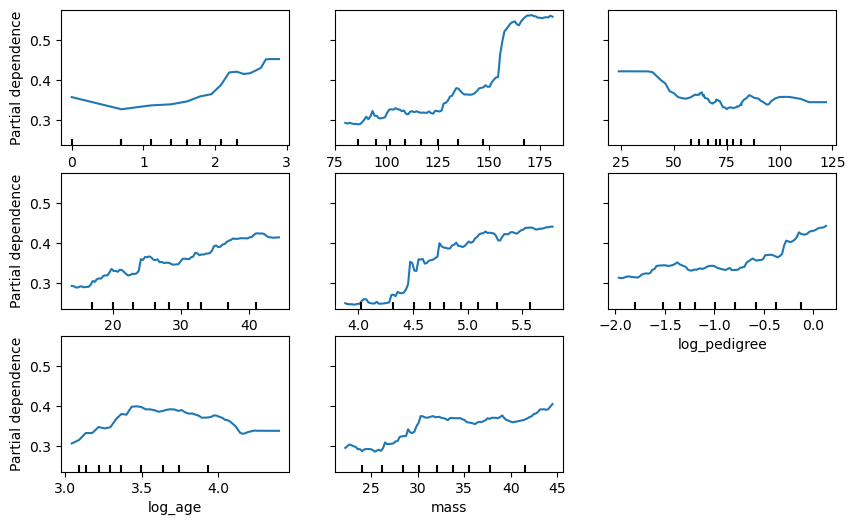

In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Fit a RandomForestClassifier model
rf_model = RandomForestClassifier(n_estimators=800, max_features=1, random_state=42)
rf_model.fit(x, y)

# Create an instance of PartialDependenceDisplay
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(rf_model, features = (0,1,2,3,4,5,6,7), X=x, ax=ax)
plt.show()

In [14]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

# Fit a RandomForestClassifier model
rf_model = RandomForestClassifier(n_estimators=800, max_features=1, random_state=42)

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(interaction_only=True, include_bias=False)
interaction_features = poly.fit_transform(x)

# Convert interaction features to DataFrame
interaction_df = pd.DataFrame(interaction_features)

# fit a random forest model
rf_model = RandomForestClassifier(n_estimators=800, max_features=16, random_state=42)
rf_model.fit(interaction_df, y)

# assess using cross-validation
cv_scores = cross_val_score(rf_model, interaction_df, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1))
print("Mean cross-validation score:", cv_scores.mean())

y_pred = cross_val_predict(rf_model, interaction_df, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1))
cm = confusion_matrix(y, y_pred)
cm

         0      1     2          3         4         5         6     7   \
0  1.945910  148.0  72.0  35.000000  5.579791 -0.466809  3.912023  33.6   
1  0.693147   85.0  66.0  29.000000  4.023256 -1.046969  3.433987  26.6   
2  2.197225  183.0  64.0  20.018286  5.501581 -0.397497  3.465736  23.3   
3  0.693147   89.0  66.0  23.000000  4.543295 -1.789761  3.044522  28.1   
4  0.000000  137.0  40.0  35.000000  5.123964  0.827678  3.496508  43.1   

           8           9   ...          26         27          28  \
0  287.994702  140.105531  ...  195.292671 -16.338306  136.920805   
1   58.917510   45.747714  ...  116.674416 -30.362103   99.585629   
2  402.092098  140.622373  ...  110.132223  -7.957207   69.378093   
3   61.690099   45.747714  ...  104.495780 -41.164514   70.024016   
4    0.000000    0.000000  ...  179.338739  28.968733  122.377765   

            29        30         31          32        33         34  \
0  1176.000000 -2.604695  21.828269  187.480964 -1.826167 -15.

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# Create the GradientBoostingClassifier
gbm = GradientBoostingClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1))

# Fit the GridSearchCV object on the training data
grid_search.fit(x, y)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_model, x, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1))

# Print the best parameters and the mean cross-validation score
print("Best parameters:", best_params)
print("Mean cross-validation score:", cv_scores.mean())

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Mean cross-validation score: 0.7013581190051779


In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.05, 0.01, 0.005],
    'n_estimators': [300, 500],
    'max_depth': [2, 3, 4]
}

# Create the GradientBoostingClassifier
gbm = GradientBoostingClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1))

# Fit the GridSearchCV object on the training data
grid_search.fit(x, y)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_model, x, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1))

# Print the best parameters and the mean cross-validation score
print("Best parameters:", best_params)
print("Mean cross-validation score:", cv_scores.mean())

y_pred = cross_val_predict(best_model, x, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1))
cm = confusion_matrix(y, y_pred)
cm

Best parameters: {'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 500}
Mean cross-validation score: 0.7053560818266702


array([[450,  49],
       [177,  91]], dtype=int64)

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create an instance of LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

# Perform cross-validation
cv_scores = cross_val_score(lda, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1))

# Print the mean cross-validation score
print("Mean cross-validation score:", cv_scores.mean())

y_pred = cross_val_predict(lda, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1))
cm = confusion_matrix(y, y_pred)
cm

Mean cross-validation score: 0.7014684661743485


array([[428,  71],
       [158, 110]], dtype=int64)

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.05, 0.1, 0.5, 1, 10],
 #   'gamma': [0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'sigmoid']
}

svc = SVC()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1))

# Fit the GridSearchCV object on the training data
grid_search.fit(X, y)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1))

# Print the best parameters and the mean cross-validation score
print("Best parameters:", best_params)
print("Mean cross-validation score:", cv_scores.mean())

y_pred = cross_val_predict(best_model, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1))
cm = confusion_matrix(y, y_pred)
cm

Best parameters: {'C': 0.1, 'kernel': 'linear'}
Mean cross-validation score: 0.711883541295306


array([[438,  61],
       [160, 108]], dtype=int64)

In [18]:
import numpy as np

# Assuming y is a numpy array or a list
y = np.array(y)  # Convert to numpy array if it's a list
y_binary = np.where(y == 'pos', 1, 0)
y_binary

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

n_nodes = [1, 8, 16, 32]

for n in n_nodes:
    model = Sequential([
        Dense(units=n, activation='relu', input_shape=(x.shape[1],)),
        Dense(units=n, activation='relu'),
        Dense(units=1, activation='sigmoid')
    ])

# Compile the model
    model.compile(optimizer=Adam(learning_rate = 0.1),
                loss='binary_crossentropy',
                metrics=['accuracy'])

    history = model.fit(x, y_binary, epochs=10, batch_size=32, verbose=0, validation_split=0.2)
    
    final_val_acc = history.history['val_accuracy'][-1]
    print("Final validation accuracy: %s" % final_val_acc)

Final validation accuracy: 0.6428571343421936
Final validation accuracy: 0.6428571343421936
Final validation accuracy: 0.6103895902633667
Final validation accuracy: 0.6428571343421936
